In [30]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\DritiG\OneDrive\Desktop\Accredian\Fraud.csv")
# Shape of the dataset i.e rows and columns of the dataset used for analysis.
print("Rows, Columns:", df.shape)

Rows, Columns: (6362620, 11)


In [4]:
# Peek at the first 5 rows by default unless you mention the count of rows inside the () 
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [5]:
# gives you Info about datatypes and nulls
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [7]:
# Basic statistics-all metrics get calculated in one function itself
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Check missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
# Distribution of target variable (isFraud)
print("\nFraud distribution:")
print(df['isFraud'].value_counts(normalize=True))


Fraud distribution:
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [10]:
# Distribution of flagged frauds
print("\nFlagged fraud distribution:")
print(df['isFlaggedFraud'].value_counts(normalize=True))


Flagged fraud distribution:
isFlaggedFraud
0    0.999997
1    0.000003
Name: proportion, dtype: float64


Fraud counts:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraud ratio:
 isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


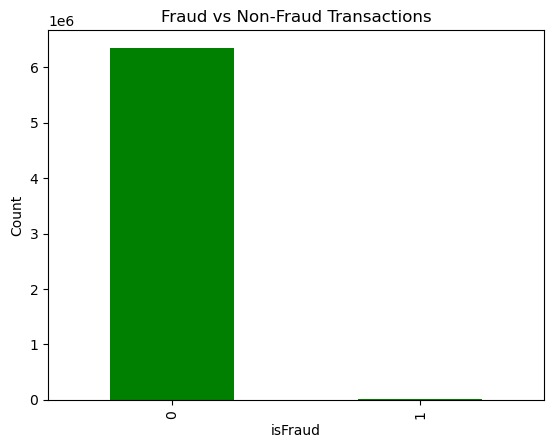

In [15]:
#Fraud Vs Non-fraud Transactions visualization
fraud_counts = df['isFraud'].value_counts()
fraud_ratio = df['isFraud'].value_counts(normalize=True)
print("Fraud counts:\n", fraud_counts)
print("\nFraud ratio:\n", fraud_ratio)

# Simple bar plot
fraud_counts.plot(kind='bar',color='green')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

In [17]:
# Feature Engineering process
# Dropping IDs
df_clean = df.drop(['nameOrig', 'nameDest'], axis=1)
# One-hot encode transaction type
#using get_dummies() to convert categorical values into binary values
df_clean = pd.get_dummies(df_clean, columns=['type'], drop_first=True)

# Create new balance delta features
#delta states the difference between the new and old balances showing the money movement
df_clean['deltaOrig'] = df_clean['oldbalanceOrg'] - df_clean['newbalanceOrig']
df_clean['deltaDest'] = df_clean['newbalanceDest'] - df_clean['oldbalanceDest']

print(df_clean.head())
print("New shape:", df_clean.shape)

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             0.0        0               0          False       False   
1             0.0        0               0          False       False   
2             0.0        1               0          False       False   
3             0.0        1               0           True       False   
4             0.0        0               0          False       False   

   type_PAYMENT  type_TRANSFER  deltaOrig  deltaDest  
0          True          False    9839.64        0.0  
1          True          False    1864.28 

In [21]:
#Train-Test Split
# using sklearn library 
#sklearn.model_selection is the module whereas the train_test_split is the function
from sklearn.model_selection import train_test_split

# Features and target variables
X = df_clean.drop('isFraud', axis=1)
y = df_clean['isFraud']

# For speed, take a 1 million row sample (stratified to keep fraud ratio)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=1000000, 
                                            stratify=y, random_state=42)
#random state is used for the reproductibility of the data by default the values is always 42.
# Split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, 
                                                    test_size=0.3, 
                                                    stratify=y_sample, 
                                                    random_state=42)

print("Training shape:", X_train.shape, y_train.shape)

Training shape: (700000, 13) (700000,)


In [19]:
print("Testing shape:", X_test.shape, y_test.shape)

Testing shape: (300000, 13) (300000,)


In [20]:
print("Fraud ratio in sample:", y_sample.mean())

Fraud ratio in sample: 0.001291


In [27]:
# Using the Logistic Regression Algorithm for model building
#linear_model and metrics are the modules 
#logisticregression, classification_report, confusion_matrix, roc_auc_score are the functions.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Training model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
log_reg.fit(X_train, y_train)

# generating the Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[286014  13599]
 [    31    356]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9546    0.9767    299613
           1     0.0255    0.9199    0.0496       387

    accuracy                         0.9546    300000
   macro avg     0.5127    0.9373    0.5132    300000
weighted avg     0.9986    0.9546    0.9755    300000

ROC-AUC Score: 0.9821205962064881


In [28]:
#even though the logistic regression did well let's try a tree based model like random forest
#random forest is typically used for capturing the nonlinear patterns whichh logistic regression might miss
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]


In [29]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
 [[299607      6]
 [    99    288]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998    299613
           1     0.9796    0.7442    0.8458       387

    accuracy                         0.9997    300000
   macro avg     0.9896    0.8721    0.9228    300000
weighted avg     0.9996    0.9997    0.9996    300000

ROC-AUC Score: 0.9854996278532642


### Business Questions & Insights